/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW


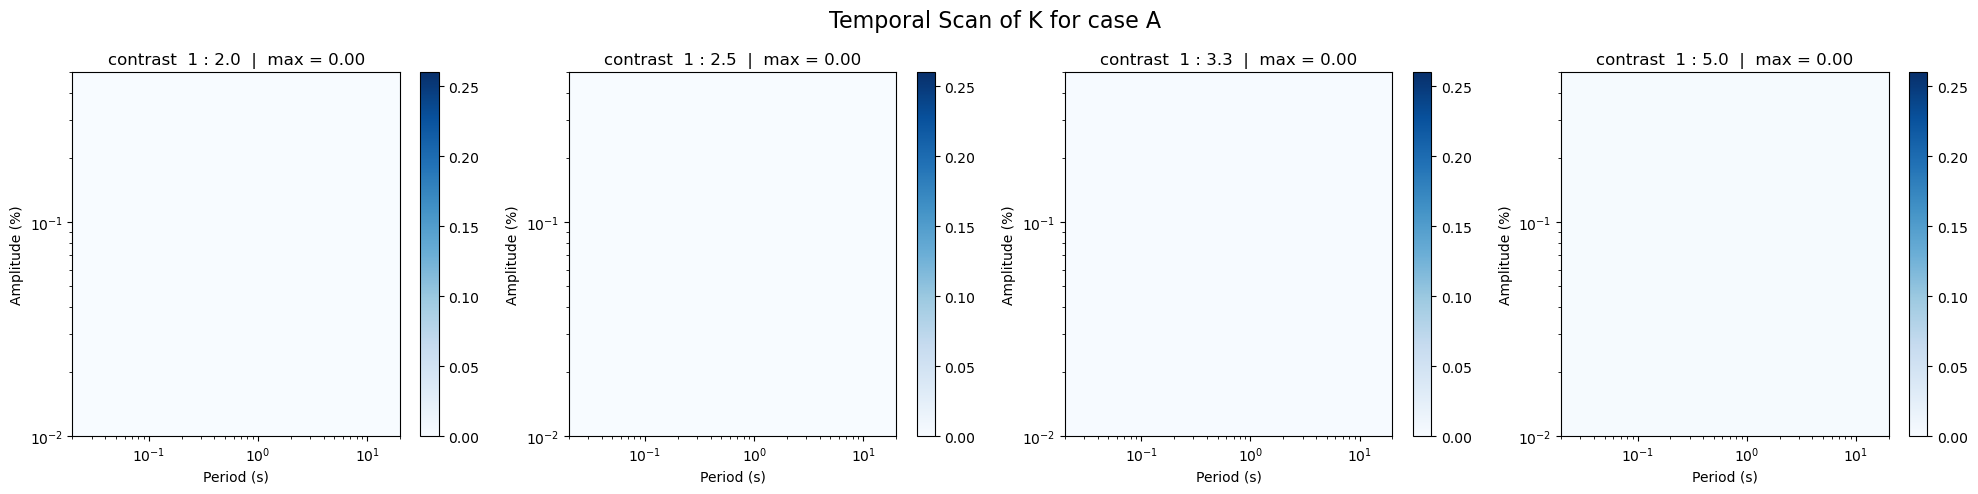

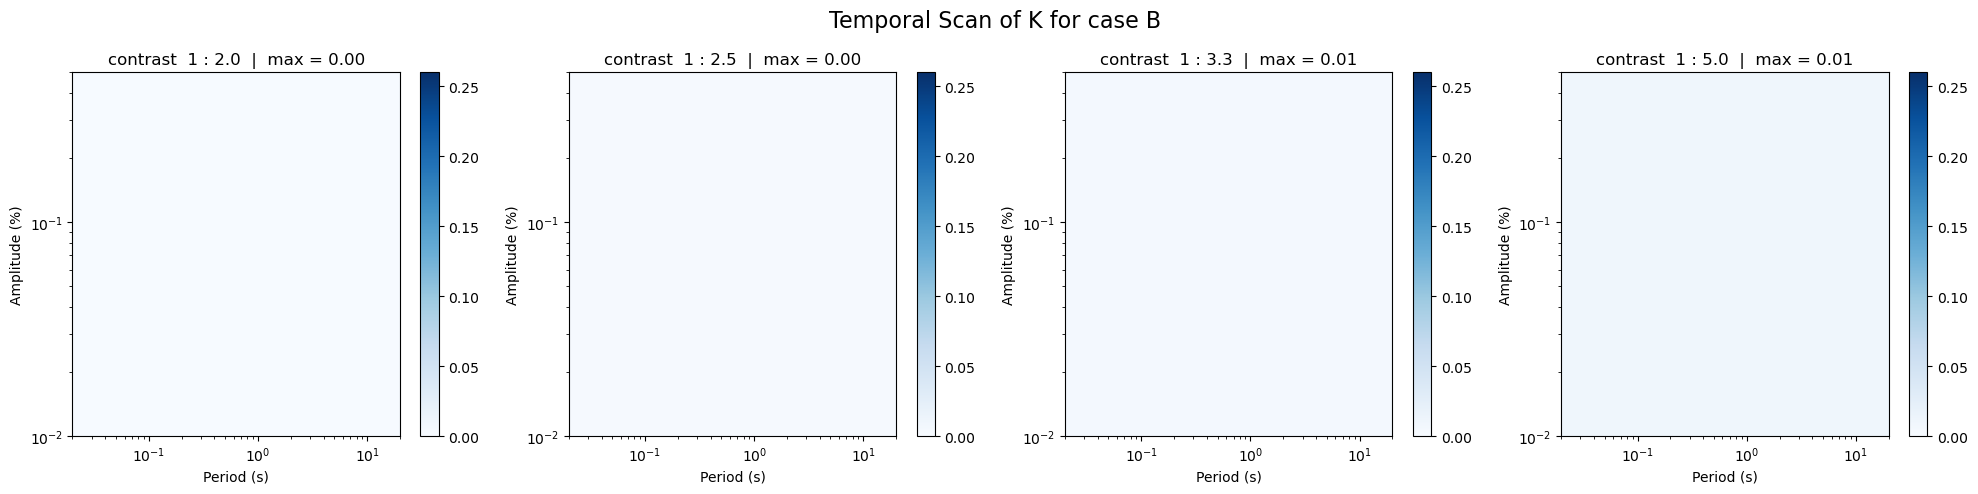

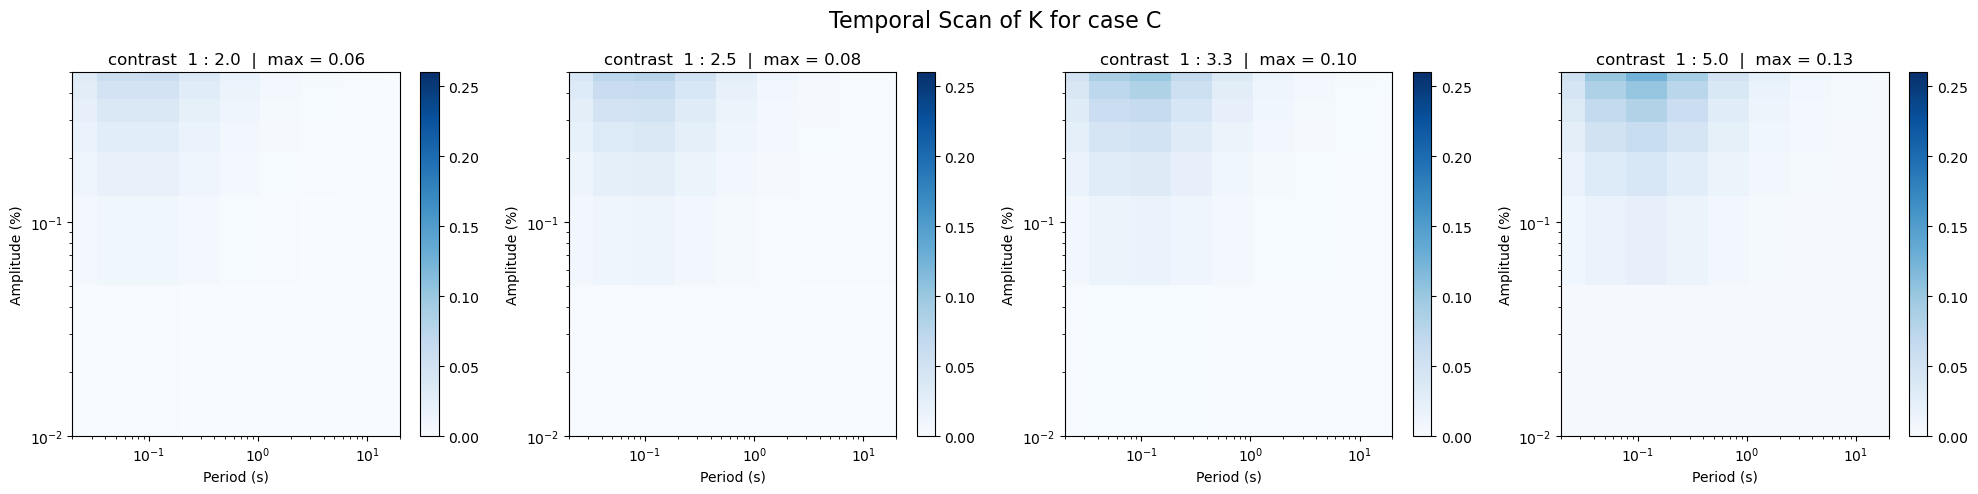

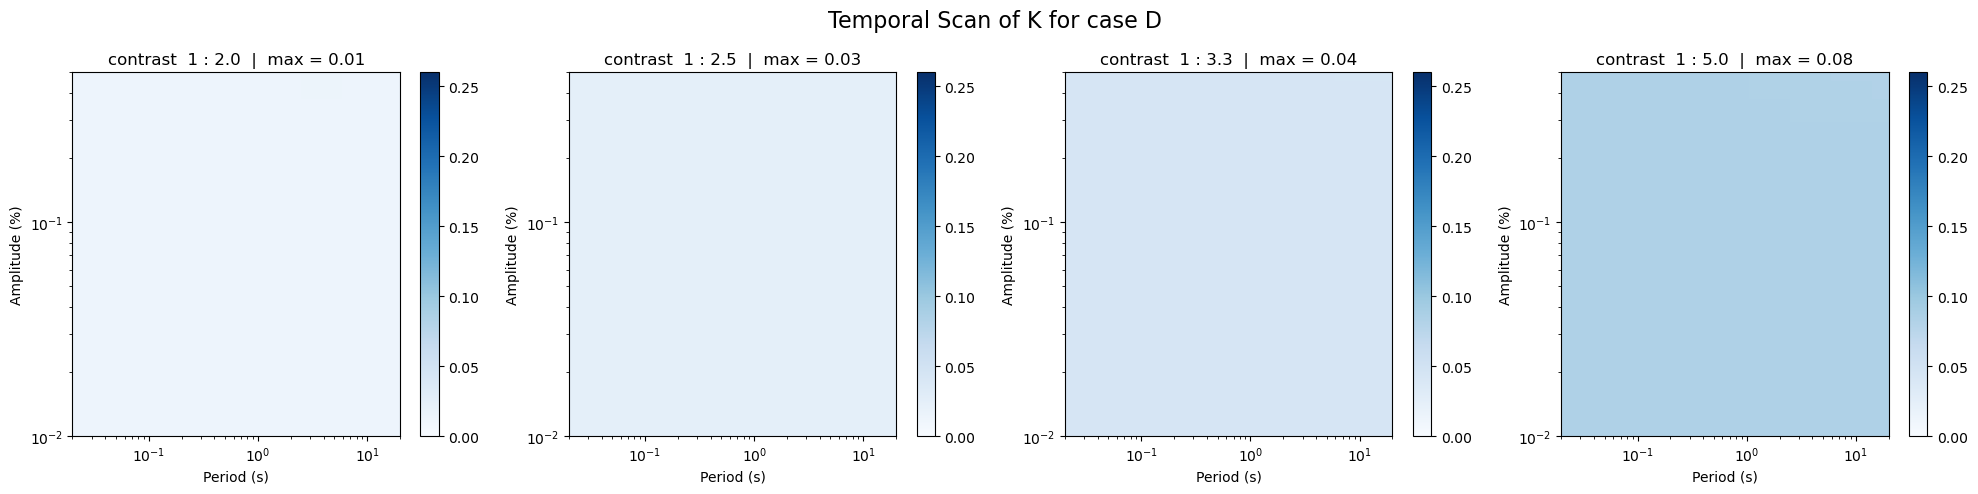

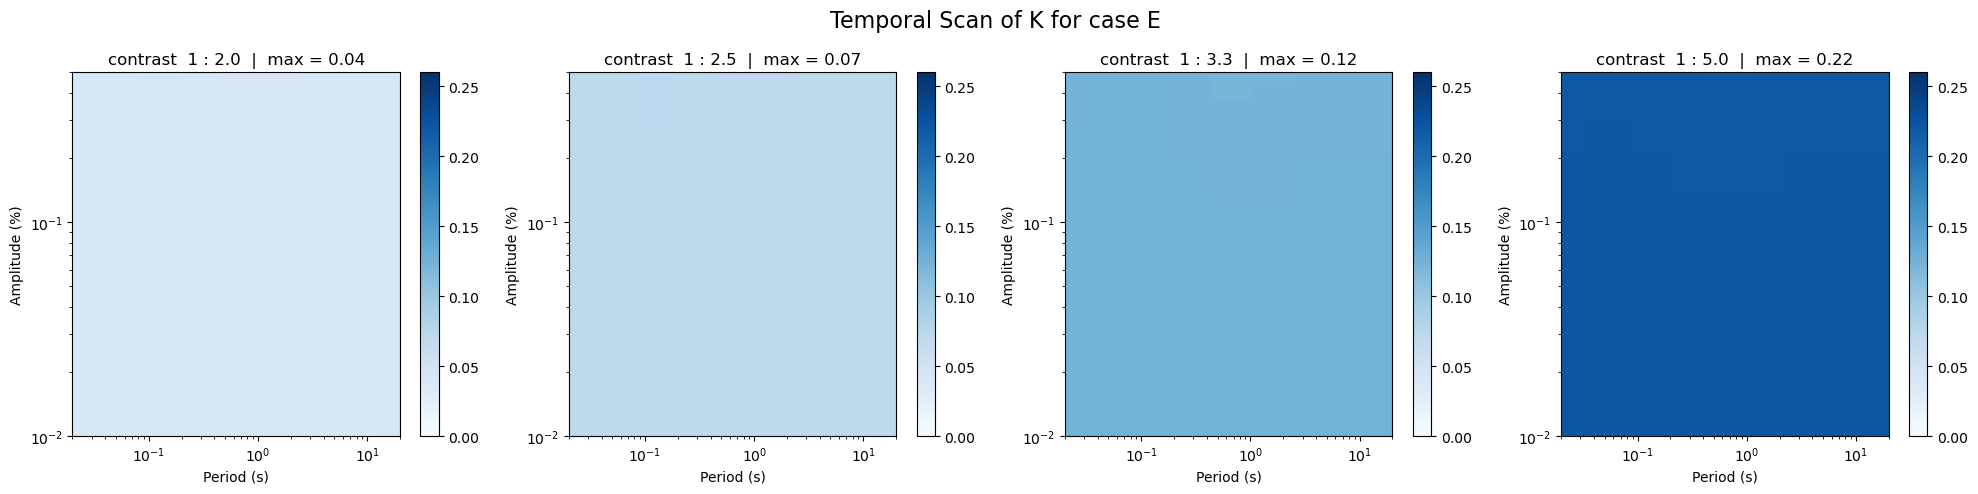

In [1]:
# FOR A GIVEN QUANTITY AND CASE, PLOT ALL HEATMAPS OVER RHOMAX SCANS

%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW

from review.utils.plotfunctions import plot_temporal_scan#, plot_all_rhomax_scans
import matplotlib.pyplot as plt

def plot_all_rhomax_scans(quantity: str, case: str, vmax: float = 0.10) -> None:
    rhomax_values = [0.5, 0.4, 0.3, 0.2]
    fig, axs = plt.subplots(1, len(rhomax_values), figsize=(20,5))
    axs = axs.flatten()    
    for ax, rhomax in zip(axs, rhomax_values):
        maximum = plot_temporal_scan(quantity, case, rhomax=rhomax, ax=ax, vmax=vmax)
        ax.set_title(f"contrast  1 : {1/rhomax:.1f}  |  max = {maximum:.2f}", fontsize=12)
    
    plt.suptitle(f"Temporal Scan of {quantity} for case {case}", fontsize=16)
    plt.tight_layout()
    plt.show()

quantity = "K"
vmax = 0.26
plot_all_rhomax_scans(quantity, "A", vmax=vmax)
plot_all_rhomax_scans(quantity, "B", vmax=vmax)
plot_all_rhomax_scans(quantity, "C", vmax=vmax)
plot_all_rhomax_scans(quantity, "D", vmax=vmax)
plot_all_rhomax_scans(quantity, "E", vmax=vmax)

0.01 0.09 0.17 0.26 0.34 0.42 0.50
0.02 0.05 0.11 0.27 0.63 1.50 3.56 8.43 20.00
Mean relative variation: 0.2203
Max relative variation: 0.2207


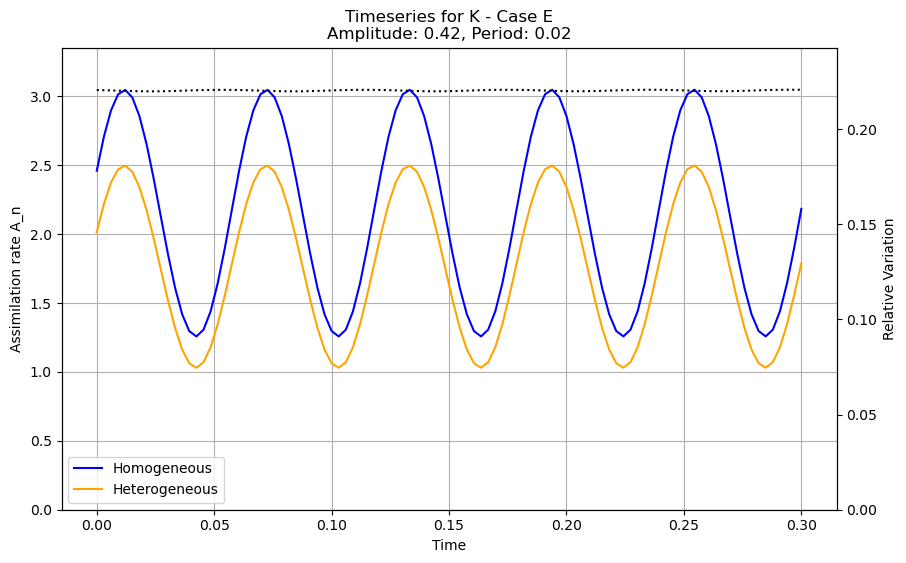

In [7]:
# INSPECT TEMPORAL SCANNING RESULTS - HEATMAP AND TIMESERIES FOR CONCRETE AMP/PERIOD

from review.utils.plotfunctions import plot_temporal_scan, plot_timeseries
from review.utils.constants import TemporalExploration 
constants = TemporalExploration()
print(*[f"{amplitude:.2f}" for amplitude in constants.get_amplitude_range()])
print(*[f"{period:.2f}" for period in constants.get_period_range()])


rhomax = 0.2
quantity = "K"
case = "E"
amplitude = 0.42 
period = 0.02
# plot_temporal_scan(quantity, case, rhomax=rhomax, vmax=0.20)
plot_timeseries(quantity, case, amplitude, period, rhomax=rhomax)

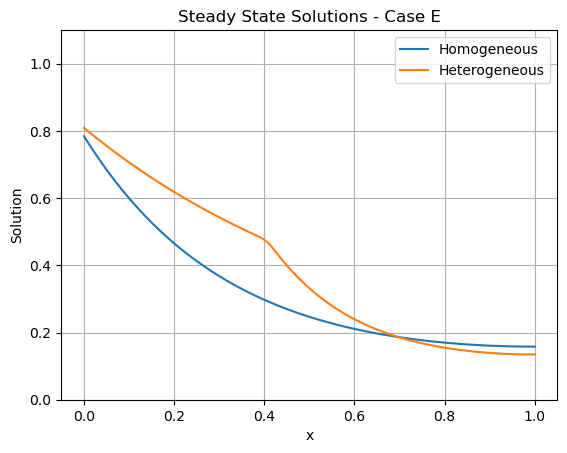

Case E - Variation: 0.1285


In [3]:
# GET STEADY PROFILES AND AN-VARIATION WITH AND WITHOUT CONTRAST (LINEAR)

from review.utils.plotfunctions import plot_steady_variation

plot_steady_variation("E", rho=(0.3, 0.3, 0.6))

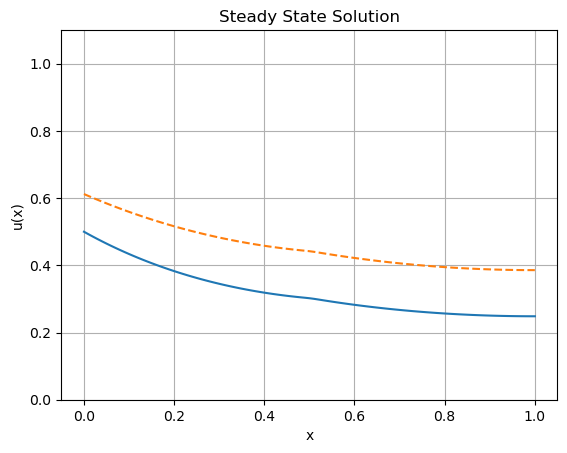

In [4]:
# COMPARE STEADY LINEAR AND -NONLINEAR SOLUTIONS

from review.steady.solver import SteadySolver 
from review.nonlinear.solver import NonlinearSolver
from review.utils.profiles import StepProfile
import matplotlib.pyplot as plt

params = [2, 2, 0.1]

delta = StepProfile()
delta.populate_rho(0.5, 0.5) 

kappa = StepProfile()
kappa.populate_rho(0.3, 0.5)

solver = SteadySolver(params,
                      delta = delta.steadify(),
                      kappa = kappa.steadify())

domain, solution = solver.solve()

plt.plot(domain, solution)

mu = 2
nonlinear_solver = NonlinearSolver(params,
                                    mu = mu,
                                    delta = delta.steadify(),
                                    kappa = kappa.steadify())

domain_nl, solution_nl = nonlinear_solver.solve()

plt.plot(domain_nl, solution_nl, '--')


plt.xlabel('x')
plt.ylabel('u(x)')
plt.ylim(0, 1.1)
plt.title('Steady State Solution')
plt.grid()
plt.show()